# Genetic Algorithm version 1

The code start from loading up the neccessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
from operator import itemgetter
import copy
import sys, os
import pandas as pd

The class itself represented here

In [11]:
class GenAlg():
    def __init__(self,genes,varmin,varmax,npop,nchild):
        self.genes = genes
        self.varmin = varmin
        self.varmax = varmax
        self.npop = npop
        self.nchild = nchild
        self.population = {}

        for i in range(npop):
            self.population[i] = {'choromosome': None, 'cost': None}
        bestsol = copy.deepcopy(self.population)
        self.bestsol_cost = np.inf
        for i in range(npop):
            self.population[i]['choromosome'] = np.random.uniform(varmin, varmax,genes)
            self.population[i]['cost'] = self.costfunc(self.population[i]['choromosome'])
            if self.population[i]['cost'] < self.bestsol_cost:                                  
                self.bestsol = copy.deepcopy(self.population[i])
        self.bs = [self.bestsol]
    def costfunc(self,x):
        return np.linalg.norm(x - np.array([5,5]))
    
############ BLOCK PARENTS CHOICE ############
    def parents(self,npop):
        q = np.random.permutation(npop)
        p1 = self.population[q[0]]
        p2 = self.population[q[1]]
        return (p1,p2)
    def parents_prob(self):
        n = np.arange(len(self.population))
        cost = np.array([])
        for i in n:
            cost = np.append(cost,[self.population[i]['cost']])
        total_cost = np.sum(cost)
        if total_cost != 0:
            probs = cost/np.median(cost)
        c = np.cumsum(probs)
        r = c*np.random.rand()
        ind = np.argwhere(r <= c)
        return ind[0][0]
                      
############ BLOCK CHILDREN MAKING ############                    
    def crossover(self,p1,p2, mu, sigma):
        childs = []
        for _ in range(self.nchild):
            alpha = np.random.uniform(0,1,*(p1['choromosome'].shape))
            c = {'choromosome': None, 'cost': None}
            c['choromosome'] = alpha*p1['choromosome'] + (1 - alpha)*p2['choromosome']
            c = self.mutation(c, mu, sigma)
            c['cost'] = self.costfunc(c['choromosome'])
            childs.append(c)
        return childs
    def crossover_uniform(self,p1,p2,mu,sigma):
        childs = []
        for _ in range(self.nchild):
            coin = np.random.randint(2,size = self.genes) 
            ind = np.argwhere(coin == 0).ravel()
            c = copy.deepcopy(p1)
            
            c['choromosome'][ind] = p2['choromosome'][ind]
            c = self.mutation(c, mu, sigma)
            c['cost'] = self.costfunc(c['choromosome'])
            childs.append(c)
        return childs       
    def crossover_one(self,p1,p2,mu,sigma):
        childs = []
        for _ in range(self.nchild):
            c = copy.deepcopy(p1)
            middle = int(len(c['choromosome'])/2)
            ind = np.arange(middle,len(c['choromosome']))
            c['choromosome'][ind] = p2['choromosome'][ind]
            c = self.mutation(c, mu, sigma)
            c['cost'] = self.costfunc(c['choromosome'])
            childs.append(c)
        return childs    
    def mutation(self,c,sigma,mu):
        y = copy.deepcopy(c)
        flag = np.random.rand(*(c['choromosome'].shape)) <= mu
        ind = np.argwhere(flag)
        y['choromosome'][ind] += sigma*np.random.randn(*ind.shape)
        
        return y
    
############ BLOCK AUXILIARILY ############ 
    def sort(self,arr):
        n = len(arr)
        for i in range(n-1):
            for j in range(0, n-i-1):
                if arr[j]['cost'] > arr[j+1]['cost'] :
                     arr[j], arr[j+1] = arr[j+1], arr[j]
        return arr

############ BLOCK MAIN ############ 
        
    def initiliazition(self,mu, sigma,maxit,num_children, parents = 'Dist', cross_over = 'Prob', iter_show =True):
        self.bestcost = np.empty(maxit+1)
         
        for it in range(maxit+1):        
            gen_children = []
            for _ in range(num_children//2):
                
                if parents == 'Dist':
                    p1 = self.population[self.parents_prob()]
                    p2 = self.population[self.parents_prob()]
                elif parents == 'Chance':
                    p1, p2 = self.parents(self.npop)
                if cross_over == 'Prob':
                    children = self.crossover(p1,p2,mu,sigma)
                elif cross_over == 'Uniform':
                    children = self.crossover_uniform(p1,p2,mu,sigma)
                elif cross_over == 'One':
                    children = self.crossover_one(p1,p2,mu,sigma)
                else:
                    print('Error')
                    return
                
                for ch in children: 
                    self.population[len(self.population)] = ch
                    if ch['cost'] < self.bestsol_cost: 
                        self.bestsol_cost = ch['cost']
                gen_children.extend(children)
            self.population = self.sort(self.population) 
            self.bestcost[it] = self.bestsol_cost
            self.bs.append(self.population[0])
            if iter_show == True: 
                print('Generation {}: Best Cost = {}'. format(it, self.bestcost[it]))
            else: 
                pass
                  
        out = self.population
        Bestsol = self.population[0]
        bestcost = self.bestcost
        bestsols = self.bs
        return (out, Bestsol, bestcost,bestsols)

In [12]:
import time
start_time = time.time()
ga = GenAlg(2,-10,10,2,3)
result = ga.initiliazition(0.2,4,100,10,cross_over = 'd')

print("--- %s seconds ---" % (time.time() - start_time))

Error
--- 0.001252889633178711 seconds ---


In [38]:
x = []
y = []
for i in result[3]:
    x.append(i['choromosome'][0])
    y.append(i['choromosome'][1])

MovieWriter ffmpeg unavailable; using Pillow instead.


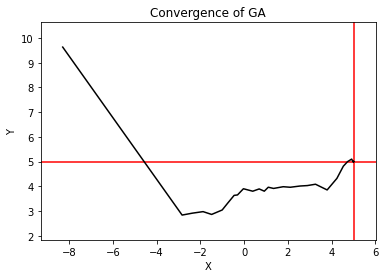

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.array(x)
y = np.array(y)
xmaxx = max(x)
xminn = min(x)
ymaxx = max(y)
yminn = min(y)


fig, ax = plt.subplots()
ax.hlines(y=5,color = 'r', xmin=xminn -1, xmax=xmaxx+1)
ax.vlines(x=5,color='r', ymin=yminn -1, ymax=ymaxx+1)
ax.set_title('Convergence of GA')
ax.set_xlabel('X')
ax.set_ylabel('Y')
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([xminn -1, xmaxx+1, yminn -1, ymaxx+1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=500,repeat = True)
ani.save('test.gif')
plt.show()

## Test for different methods of parents choice

### Uniform

In [31]:
error = []
for i in tqdm(range(100)):
    ga = GenAlg(2,-10,10,2,3)
    result = ga.initiliazition(0.2,3,100,10,iter_show = False )
    error.append(result[1]['cost'])

100%|██████████| 100/100 [10:52<00:00,  6.52s/it]


In [21]:
np.median(error)

0.008667052945822217

In [7]:
error_ch = []
for i in tqdm(range(50)):
    ga = GenAlg(2,-10,10,2,3)
    result = ga.initiliazition(0.2,3,100,10,iter_show = False,parents = 'Chance' )
    error_ch.append(result[1]['cost'])

100%|██████████| 50/50 [02:23<00:00,  2.86s/it]


In [9]:
np.mean(error_ch)

0.04803680912340149

In [ ]:
error_ch = []
for i in tqdm(range(50)):
    ga = GenAlg(2,-10,10,2,3)
    result = ga.initiliazition(0.2,3,100,10,iter_show = False,cross_over = 'Uniform' )
    error_ch.append(result[1]['cost'])

  2%|▏         | 1/50 [00:12<10:19, 12.65s/it]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1369, dtype: object